# 1) Step 1 : EDA :

Exploratey data analysis :

In [1]:
#loading the libiraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix

In [2]:
#loading our data
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#total rows and columns dataset
df.shape

(1338, 7)

In [5]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**we have outliers in charges from 9382.03 in median to 1338.0 in mean.**

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**we don't have any null cells**

In [8]:
def data_info(data):
    cols = data.columns
    unique_values = [data[col].value_counts().head(10).index.to_array()for col in cols]
    n_uniques = [data[col].nunique() for col in cols]
    dtypes = [data[col].dtype for col in cols]
    nulss = [data[col].isnull().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({"col":cols,"dtype":dtypes,"n_uniques":n_uniques,"n_nan":nulss,"unique_val":unique_values,"duplicated":dup})

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df["age"].value_counts().head().index.to_numpy()

array([18, 19, 50, 51, 47])

In [11]:
df["sex"].value_counts().head().index.to_numpy()

array(['male', 'female'], dtype=object)

In [12]:
df["bmi"].value_counts().head().index.to_numpy()

array([32.3  , 28.31 , 30.495, 30.875, 31.35 ])

In [13]:
df["children"].value_counts().head().index.to_numpy()

array([0, 1, 2, 3, 4])

In [14]:
df["smoker"].value_counts().head().index.to_numpy()

array(['no', 'yes'], dtype=object)

In [15]:
df["region"].value_counts().head().index.to_numpy()

array(['southeast', 'southwest', 'northwest', 'northeast'], dtype=object)

In [16]:
df["charges"].value_counts().head().index.to_numpy()

array([ 1639.5631 , 16884.924  , 29330.98315,  2221.56445, 19798.05455])

**+ Categorical:**

* 'sex'
* 'smoker'
* 'region'

**+ Numerical:**

* 'age'
* 'bmi'
* 'children'
* 'charges'

# Categorical Feature in Insurance Data.

In [17]:
def categorical_plot(data, columns, numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
      if len(data[column].unique()) < numbers_of_cat_value:
          plt.subplot(total_rows , total_cols , plot_index)
          sns.countplot(x=data[column], palette="rocket", hue=data[column])
          plt.title(f"count plot of {column}")
          plot_index += 1
      else:
           print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

column 'age' is not categorical.
column 'bmi' is not categorical.
column 'children' is not categorical.
column 'charges' is not categorical.


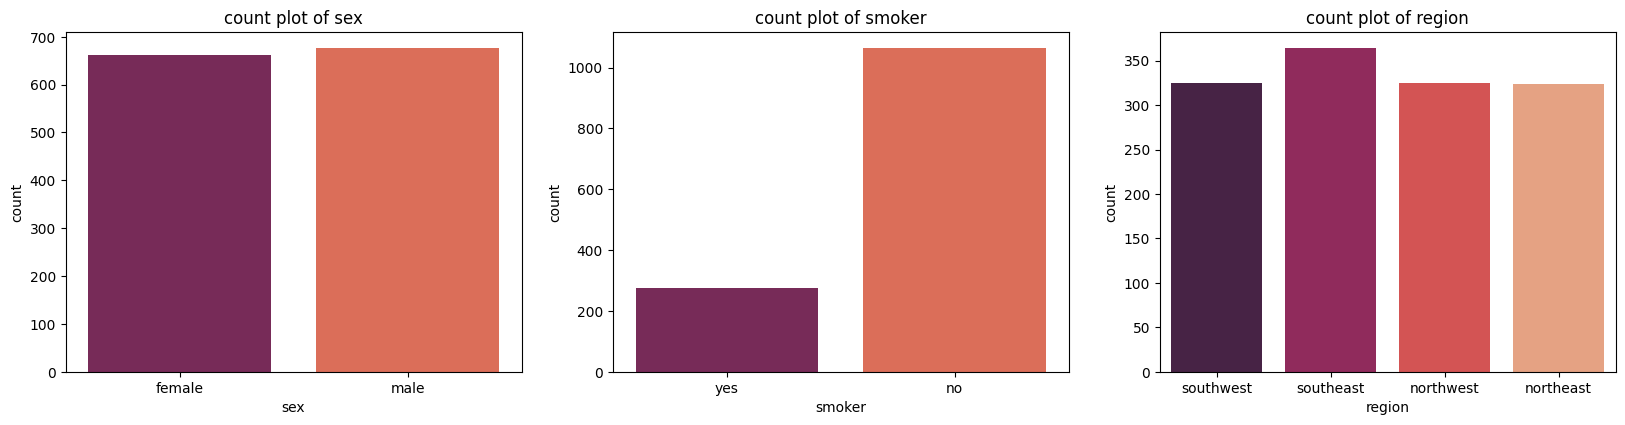

In [18]:
categorical_plot(df, df.columns, 5)

**we have :**

*   People in the category of  sex : men are slightly more than women.
*   People in the category of  smoker : Approximately 30% of people smoke only.
*   People in the category of  region : more of people are slightly live in southeast.


# Continuous features in Insurance Data

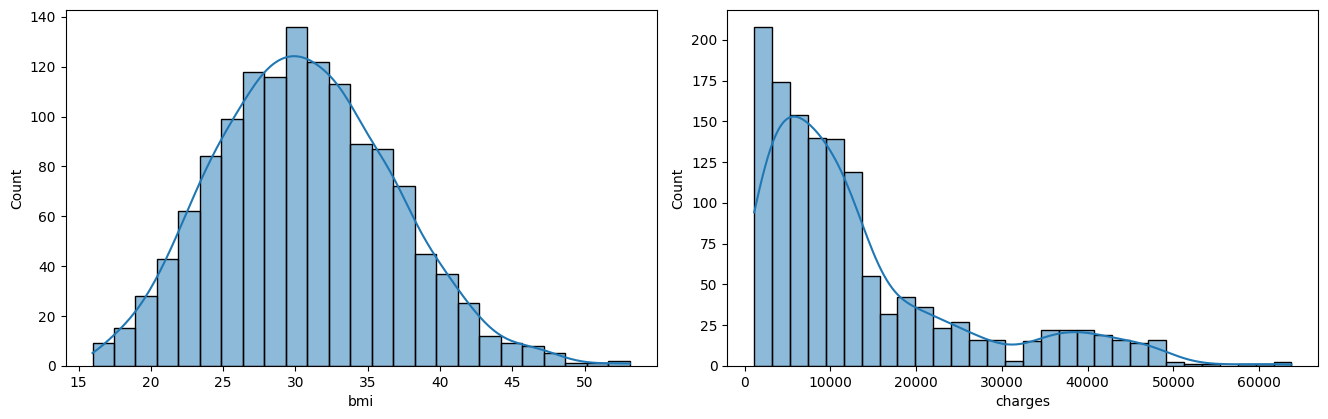

In [19]:
continuous_features = ["bmi" , "charges"]
plt.figure(figsize=(20,8))
for i in range(len(continuous_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.histplot(df[continuous_features[i]],kde=True)
plt.tight_layout()
plt.show()

**So that the continuous features are : bmi & charges.**


*   bmi is a normal distribution.
*   charges is a right skew.



In [20]:
df.skew(numeric_only = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

**1. The number of children (children) is moderately positively skewed.**


**2.  Medical charges (charges) exhibit significant large positive skewness.**

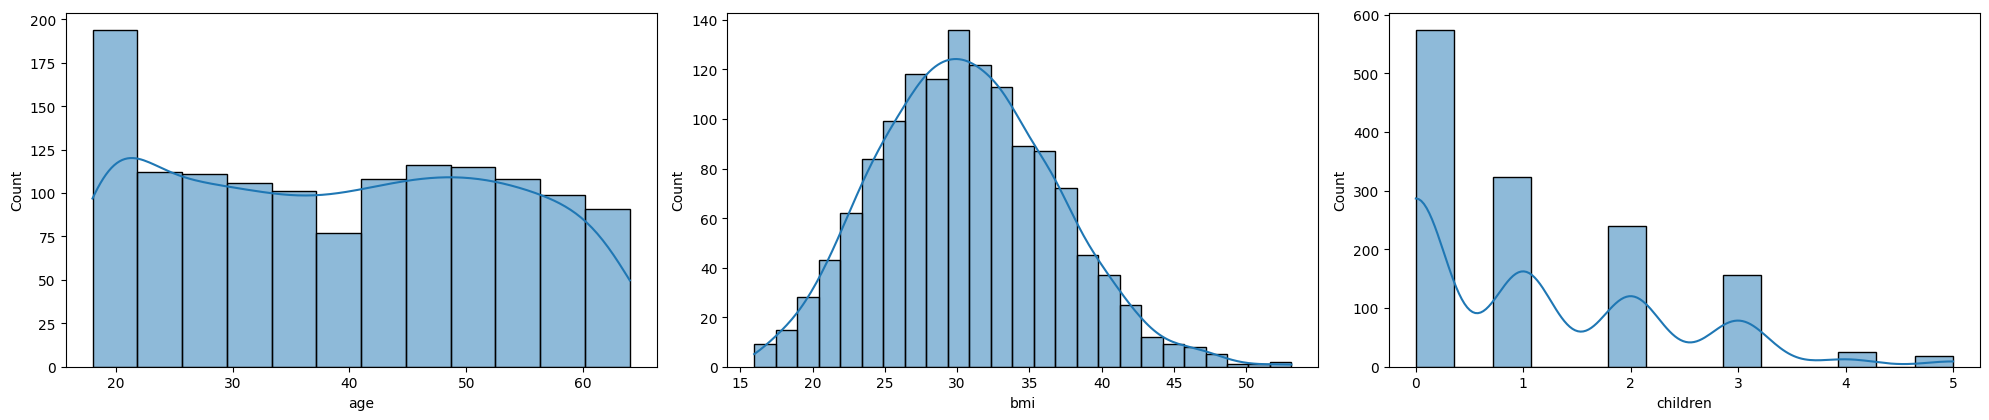

In [21]:
cont_features = ['age','bmi','children']
plt.figure(figsize=(20,8))
for i in range(len(cont_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.histplot(df[cont_features[i]],kde=True)
plt.tight_layout()
plt.show()

**1. Most of people are in the same age, but most of them are in their twenties.**

**2. Most of people in bmi(body mass index) are from 25 to 35**

**3. There are alot of people don't have any children**


In [22]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

**charges is a unique column but its our target we can't drop it.**

In [23]:
def categorical_plot_target(data , columns , target):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
        if  data[column].nunique() < 10:
            plt.subplot(total_rows , total_cols , plot_index)
            sns.countplot(x = data[column] , palette = "rocket" , hue = data [target])
            plt.title(f"count plot of {column} with smoker")
            plot_index += 1
        else:
            print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

column 'age' is not categorical.
column 'bmi' is not categorical.
column 'charges' is not categorical.


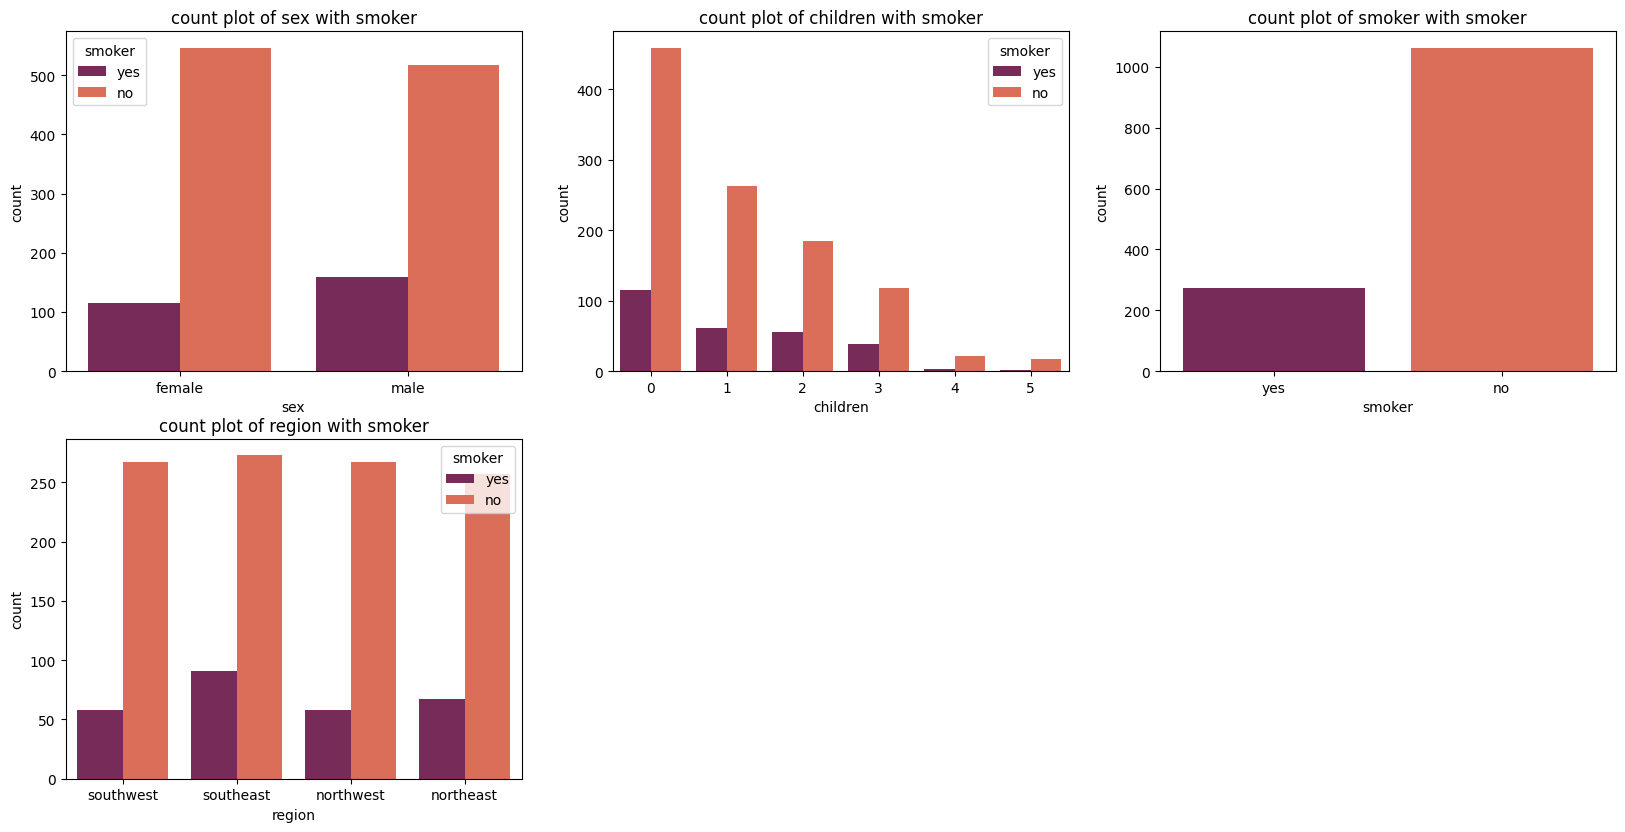

In [24]:
categorical_plot_target(df,df.columns,"smoker")



**1.   Female smoke more than men.**

**2.   People who have more than one child smoke less than those who do not have children**

**3.   We have here Approximately 30% of people smoke.**

**4.   Less than people not smoke are in northeast**

# Correlation

In [25]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


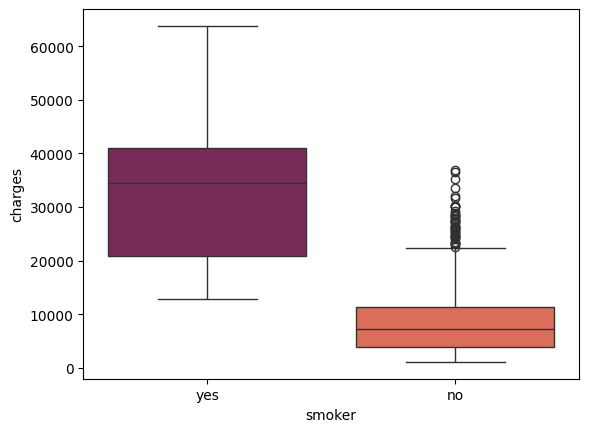

In [26]:
# Create the boxplot
sns.boxplot(x="smoker", y="charges", data = df, hue="smoker", palette="rocket");

**1. There is alot of outliers in column smoker.**

**2. People who smoking are spending alot of money approximately from 20,000 to 40,000.**

# Detected Outliers

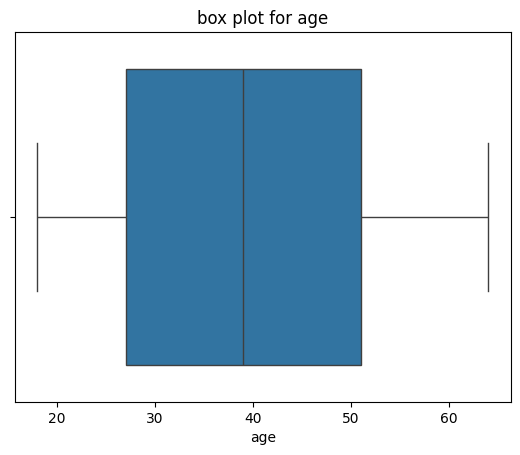

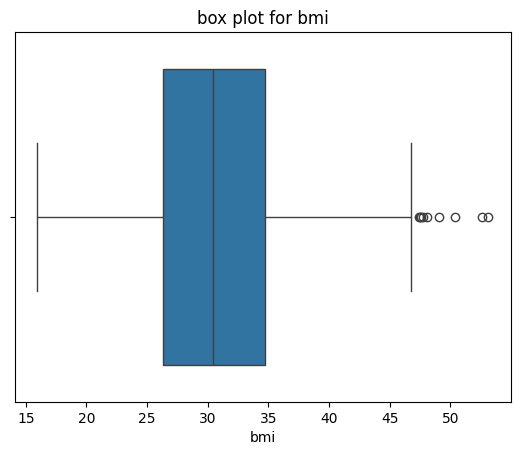

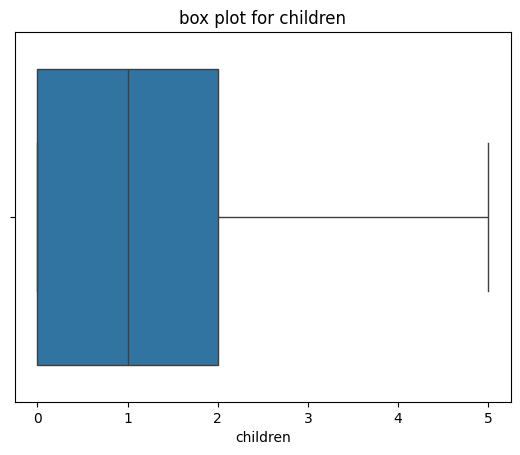

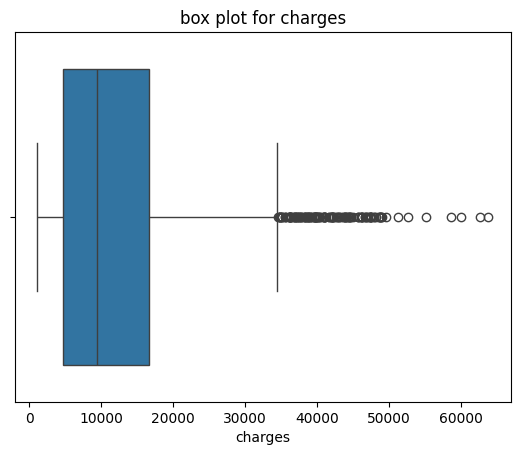

In [27]:
# making box plot for all numerical column
numeric_columns=df.select_dtypes(include=['number'])
for column in numeric_columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"box plot for {column}")
  plt.show()

**There are a little of outliers in bmi column and alot of it in charges column.**

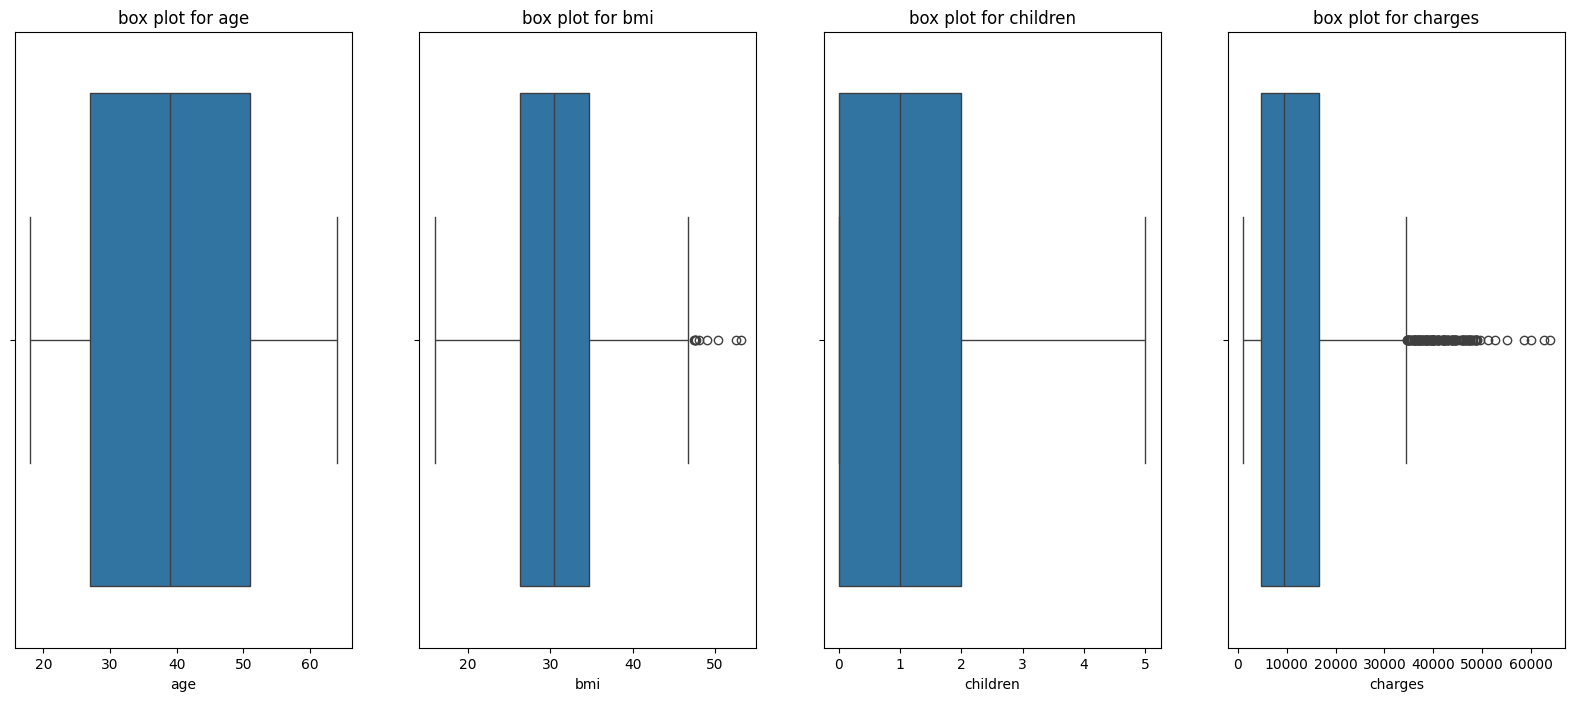

In [28]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include = ['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize = (20 , 8))
    for i , column in enumerate(numeric_columns.columns):
        plt.subplot(1 , num_cols , i + 1)
        sns.boxplot(x = numeric_columns[column])
        plt.title(f'box plot for {column}')
boxplot_numeric_columns(df)

# 2) Step 2 : Data Preprocessing

# handling missing values

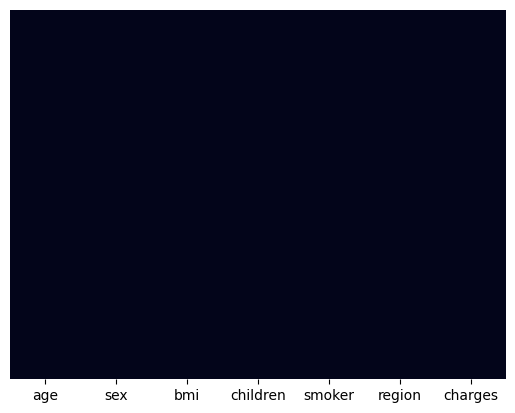

In [29]:
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = "rocket");

**Ther is no any missing values**

# Duplicated values

In [30]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
df.duplicated().sum()

1

In [32]:
# calculates the total number of duplicated rows .
index = df[df.drop(['charges'], axis=1).duplicated()].index
# drop the duplicated rows
df.drop(index , axis = 0)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
df.duplicated().sum()

1

# Outliers Detection

# (IQR)

In [34]:
q1 , q3 = df['charges'].quantile([0.25 , 0.75])
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [35]:
outliers = df[(df['charges'] > upper_limit) | (df['charges'] < lower_limit)].index
outliers

Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
       ...
       1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323],
      dtype='int64', length=139)

In [36]:
df.drop(outliers , axis = 0)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
def remove_outliers_iqr_countinuous(data , columns):
    for col in columns:
        if data[col].dtype != 'object':
           q1 , q3 = data[col].quantile([0.25 , 0.75])
           iqr = q3 - q1
           lower_limit , upper_limit = q1 - 1.5 * iqr , q3 + 1.5 * iqr
           filt=(data[col] < lower_limit) | (data[col] > upper_limit)
           data = data[~filt]
    return data.reset_index(drop = True)

In [38]:
df = remove_outliers_iqr_countinuous(df , ['bmi'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


# (Z-score)

In [39]:
def remove_outliers_z_countinuous(data , upper_threshod = 3 , lower_threshold = -3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    print(skewness)
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5 :
           z_scores = (data[column] - data[column].mean()) / data[column].std()
           outliers =(z_scores < lower_threshold ) | (z_scores > upper_limit)
           data = data[~outliers]
    return data.reset_index(drop = True)

In [40]:
remove_outliers_z_countinuous(df)

age         0.058413
bmi         0.157180
children    0.936628
charges     1.500577
dtype: float64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


# Skewness

In [41]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [42]:
def skewness_log_square(data , numbers_of_cat_value):
  features = data.select_dtypes(np.number).columns
  for feature in features:
      if data[feature].nunique() <= numbers_of_cat_value:
          print(f"Categorical featuers {feature}")
          continue

      skewness = data[feature].skew()
      if skewness  > 0.5 :
        transformation = np.log1p
        transformation_name = "log"
      elif skewness < -0.5 :
        transformation = np.square
        transformation_name = "square"
      else :
        print(f"Normal distibution {feature}")
        continue

      logTr = ColumnTransformer(transformers = [(transformation_name.lower(), FunctionTransformer(transformation),[feature])])
      plt.figure(figsize=(15,6))
      plt.subplot(1,2,1)
      plt.title(f"distribution of {feature} before transformation" , fontsize = 15 )
      sns.histplot(data[feature], kde = True , color = "green")
      plt.subplot(1,2,2)

      df_transformed = pd.DataFrame(logTr.fit_transform(data))
      plt.title(f"Distribution of {feature} after transformation" , fontsize = 15)
      sns.histplot(df_transformed, bins = 20 , kde = True ,legend = False)
      plt.xlabel(feature)
      plt.show()

      print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew())} after log transformation. ")
      data[feature] = df_transformed[0]
  return data

Normal distibution age
Normal distibution bmi
Categorical featuers children


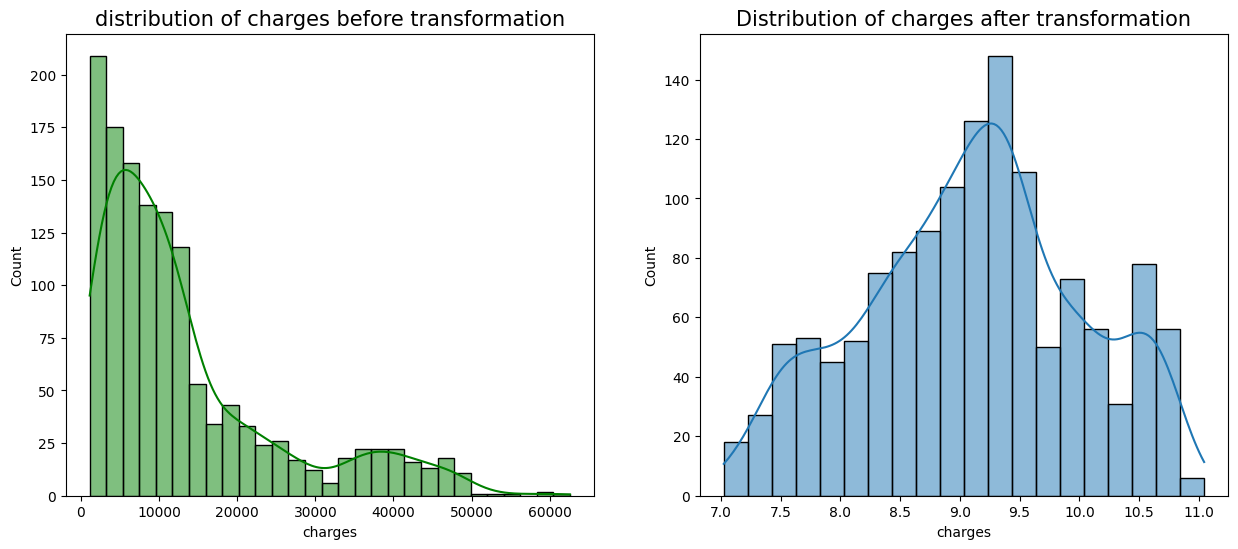

Skewness was 1.50058 before & is 0 after log transformation. 


In [43]:
df = skewness_log_square(df , 10)

**charges column is now normal distribution after log transformatiom.**

# **Removing Irrelevant Columns**

In [44]:
pd.set_option("display.max_columns" , None)

In [45]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [46]:
# dropping the region column
df.drop(["region"] , axis = 1 , inplace = True)

In [47]:
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,9.734236
1,18,male,33.770,1,no,7.453882
2,28,male,33.000,3,no,8.400763
3,33,male,22.705,0,no,9.998137
4,32,male,28.880,0,no,8.260455
...,...,...,...,...,...,...
1324,50,male,30.970,3,no,9.268755
1325,18,female,31.920,0,no,7.699381
1326,18,female,36.850,0,no,7.396847
1327,21,female,25.800,0,no,7.605365


# Encoding Categorical Columns

**we have the sex and smoker and we'll use with them the Ordinal-Encoder**

In [48]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [49]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# Step 1: Ordinal Encoding for 'sex' column
df['sex'] = df['sex'].astype('object')
# Ensure 'sex' column is treated as object (categorical)
# Step 2:
# order the male = 1 and female = 0
ordinal_encoder = OrdinalEncoder()
df['sex_encoded'] = ordinal_encoder.fit_transform(df[['sex']])


# Encode 'smoker' column as binary (1 for 'yes', 0 for 'no')
df['smoker_encoded'] = (df['smoker'] == 'yes').astype(int)
# Step 3: Concatenate encoded columns and drop original columns
# One-Hot Encoding for 'smoker' column
df_get_dummies = pd.get_dummies(df['smoker'], drop_first=True)
df_encoded = pd.concat([df, df_get_dummies], axis=1)
# Drop the original 'sex' and 'smoker' columns
df_encoded.drop(['sex', 'smoker'], axis=1, inplace=True)

In [50]:
df.drop(["smoker","sex"] , axis = 1 , inplace = True)
# Display the modified DataFrame with encoded columns
df

,age,bmi,children,charges,sex_encoded,smoker_encoded
0,19,27.900,0,9.734236,0.0,1
1,18,33.770,1,7.453882,1.0,0
2,28,33.000,3,8.400763,1.0,0
3,33,22.705,0,9.998137,1.0,0
4,32,28.880,0,8.260455,1.0,0
...,...,...,...,...,...,...
1324,50,30.970,3,9.268755,1.0,0
1325,18,31.920,0,7.699381,0.0,0
1326,18,36.850,0,7.396847,0.0,0
1327,21,25.800,0,7.605365,0.0,0


# 3) machine learning


# Linear Regression

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded'], dtype='object')

In [53]:
#This code was working before I did run all, but when I did run all, the results differed in the data science part
#x = df['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded']]

#this is the new code with new names for the columns
x = df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded']]
# x = df.drop(columns = ['charges])


#this is our target "y"
y = df['charges']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.4 , random_state = 42)

In [56]:
x_train

,age,bmi,children,sex_encoded,smoker_encoded
336,50,32.300,1,1.0,1
47,28,34.770,0,0.0,0
106,19,28.400,1,0.0,0
986,50,31.600,2,0.0,0
55,58,36.955,2,1.0,1
...,...,...,...,...,...
1095,58,36.080,0,1.0,0
1130,33,30.250,0,1.0,0
1294,25,20.800,1,0.0,0
860,18,37.290,0,1.0,0


In [57]:
y_train

336     10.643521
47       8.176932
106      7.754704
986      9.222212
55      10.768432
          ...    
1095     9.338231
1130     8.217534
1294     8.073960
860      7.040926
1126     9.887070
Name: charges, Length: 797, dtype: float64

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
# making the object
lm = LinearRegression()

In [60]:
# fit the model
lm.fit(x_train , y_train)

LinearRegression()

In [61]:
# ceta zero
lm.intercept_

6.943341423400625

In [62]:
# These numbers are the numbers of the features we have in x
lm.coef_

array([ 0.03468256,  0.0136539 ,  0.10348097, -0.11206087,  1.55258993])

In [63]:
coeff_df = pd.DataFrame(lm.coef_ , x.columns , columns = ['coefficient'])
coeff_df

,coefficient
age,0.034683
bmi,0.013654
children,0.103481
sex_encoded,-0.112061
smoker_encoded,1.552590


In [64]:
predictions = lm.predict(x_test)

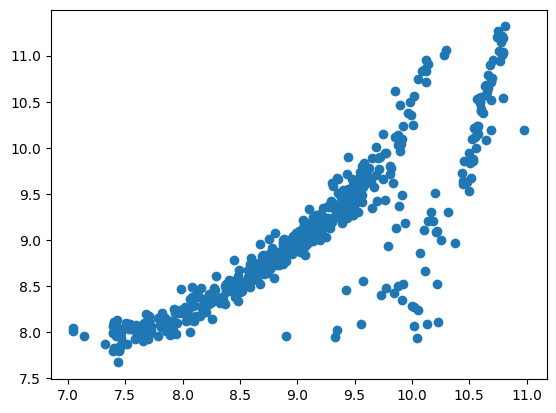

In [65]:
plt.scatter(y_test , predictions);

**We can't draw a straight line ( linear regression ) in this graph**

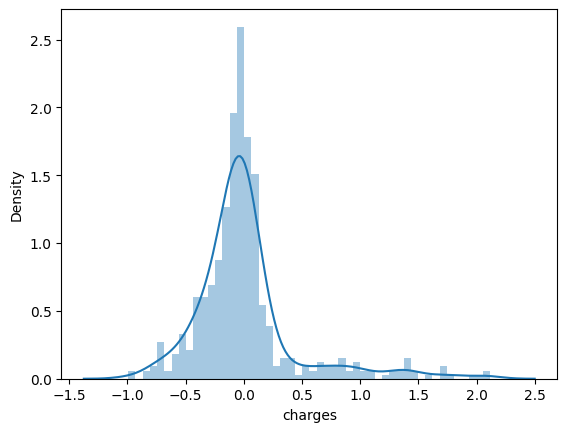

In [66]:
sns.distplot((y_test - predictions) , bins = 50);

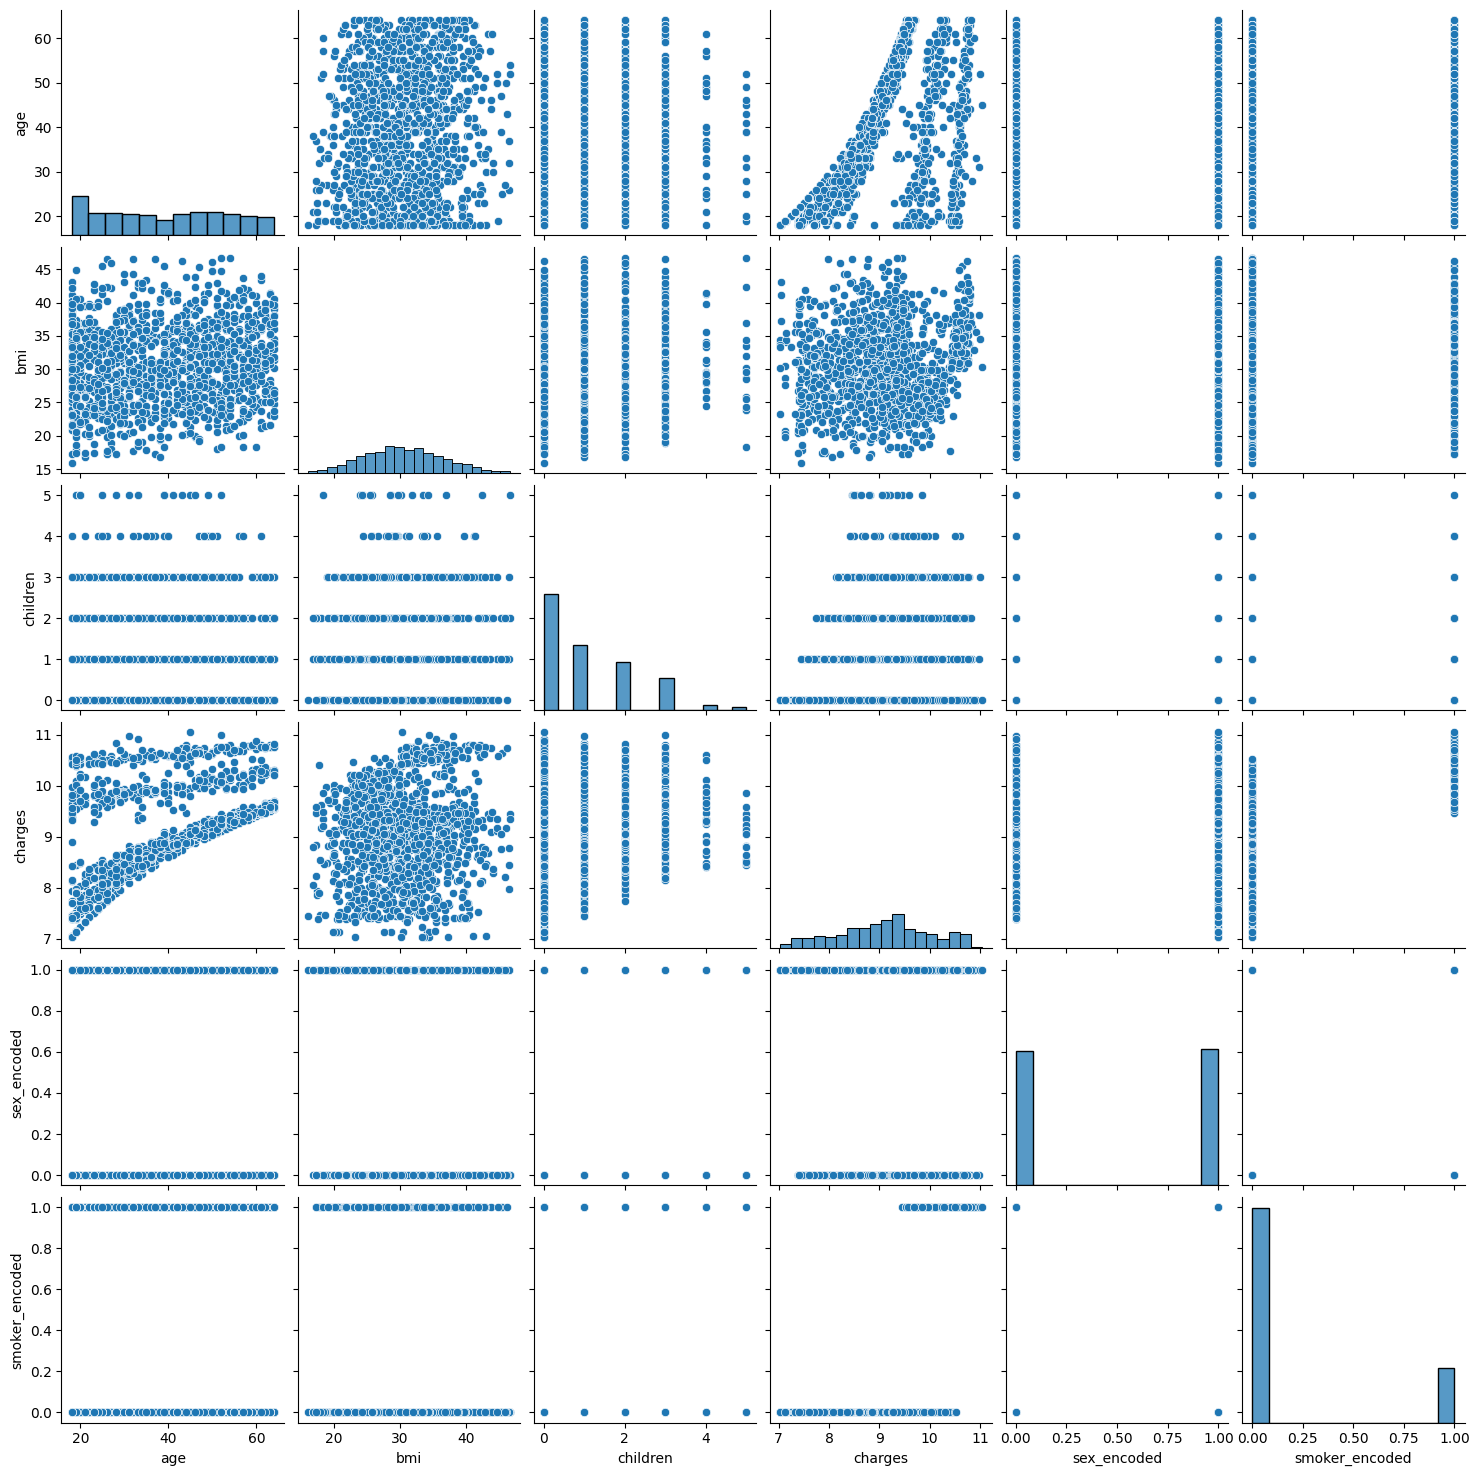

In [102]:
sns.pairplot(df);

In [68]:
# to calculat mean square error
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [69]:
print('MSE :' ,mean_squared_error(y_test , predictions))

MSE : 0.19757956675483418


In [70]:
# if we going to compare this number with train
predictions_train = lm.predict(x_train)

In [71]:
print('MSE :' ,mean_squared_error(y_train , predictions_train))

MSE : 0.20103757559422553


In [72]:
# to get the score for test
lm.score(x_test , y_test )

0.7525470375363109

In [73]:
# to get the score for train
lm.score(x_train , y_train )

0.7675685655160643

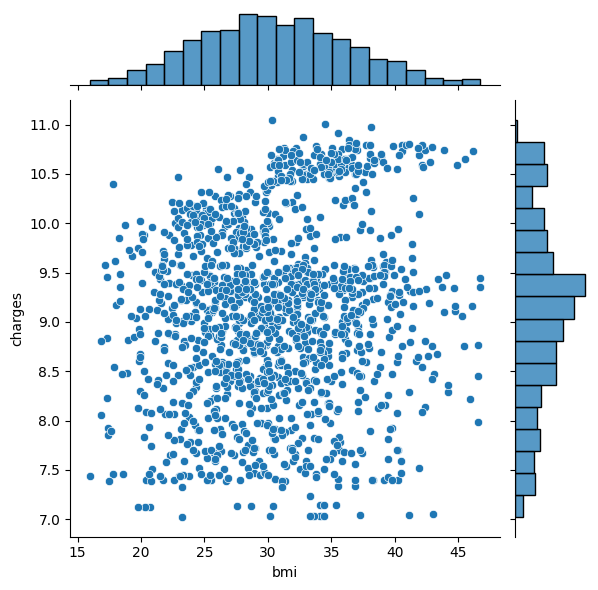

In [74]:
sns.jointplot(x = "bmi" , y = "charges" , data = df);

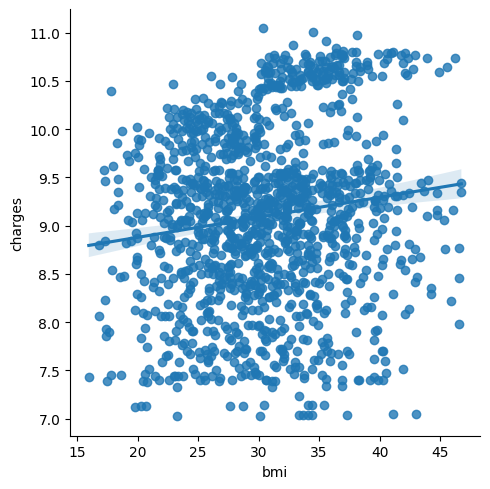

In [103]:
sns.lmplot(x = "bmi" , y = "charges" , data = df);

In [75]:
x = df.drop(columns = ["charges"])
y = df["charges"]

# Eplination and analysis

# spliting data into training and testing sets :

In [76]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [77]:
x_train.shape

(996, 5)

# Polynomial Regression Model:

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [79]:
# Create polynomial features with degree = 3
poly = PolynomialFeatures(degree = 3)
# Initialize Linear Regression model
lin = LinearRegression()

In [80]:
# Transform training and testing features to polynomial features
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [81]:
x_train_poly.shape

(996, 56)

# Fitting and Predicting with Polynomial Regression:

In [82]:
# Fit the linear regression model on the polynomial features of the training set
lin.fit(x_train_poly , y_train)

LinearRegression()

In [83]:
# Predict target values for training and testing sets
y_pred_train = lin.predict(x_train_poly)
y_pred_test = lin.predict(x_test_poly)

# Calculating Mean Absolute Error:

In [84]:
# Calculate mean absolute error for training set predictions
mean_absolute_error(y_train, y_pred_train)

0.20431610203910291

In [85]:
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (Training Set):", mae_train)

Mean Absolute Error (Training Set): 0.20431610203910291


In [86]:
# Calculate mean absolute error for testing set predictions
mean_absolute_error(y_test, y_pred_test)

0.19903388210063727

In [87]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (Testing Set):", mae_test)

Mean Absolute Error (Testing Set): 0.19903388210063727


**Create another polynominal by another degree**

In [88]:
poly_1 = PolynomialFeatures(degree = 2)
lin = LinearRegression()
x_train_poly = poly_1.fit_transform(x_train)
x_test_poly = poly_1.fit_transform(x_test)
lin.fit(x_train_poly , y_train)

LinearRegression()

In [89]:
y_pred_train = lin.predict(x_train_poly)
y_pred_test = lin.predict(x_test_poly)

In [90]:
mean_absolute_error(y_train, y_pred_train)

0.2117618258452242

In [91]:
mean_absolute_error(y_test, y_pred_test)

0.19897622882273833

**the difference between them is near to equal 0.013 ,so it's a good fit**
**but let us try the ''Lasso'' and ''Ridge'' Regression**

# Lasso model

In [105]:
# import the 'LASSO' model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 2)
lasso_reg.fit(x_train , y_train)


Lasso(alpha=2)

In [138]:
lasso_reg.score(x_train , y_train)*100

24.882405834413913

In [137]:
lasso_reg.score(x_test , y_test)*100

27.732782554804537

**VERY BAD DEGREE**

# Ridge model

In [110]:
# import the 'RIDGE' model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 2)
ridge_reg.fit(x_train , y_train)

Ridge(alpha=2)

In [136]:
ridge_reg.score(x_train , y_train)*100

75.83817610822032

In [135]:
ridge_reg.score(x_test , y_test)*100

77.62155819749668

**THAT's better than Lasso , but it's still not good fit**

# 'Decission Tree'

In [115]:
# import the 'Decission Tree' model
from sklearn.tree import DecisionTreeRegressor

In [116]:
reg = DecisionTreeRegressor(criterion = 'squared_error' , max_depth = 3 , min_samples_split = 10 , random_state = 6)

In [117]:
reg.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=10, random_state=6)

In [119]:
y_pred = reg.predict(x_test)

In [120]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , y_pred)

0.1638743524656579

In [134]:
y_pred_trainn = reg.predict(x_train)
mean_squared_error(y_train , y_pred_trainn)

0.1666993856245997

In [131]:
reg.score(x_train , y_train)*100

80.56399096153606

In [132]:
reg.score(x_test , y_test)*100

79.07225776931686

**There is no overfit here, and there's a GOOD fit here : by using DECISION TREE REGRESSION**

In [126]:
# if we want to drw this tree
# IMPORT THE TREE
from sklearn import tree

[Text(0.5, 0.875, 'x[4] <= 0.5\nsquared_error = 0.858\nsamples = 996\nvalue = 9.101'),
 Text(0.25, 0.625, 'x[0] <= 32.5\nsquared_error = 0.569\nsamples = 787\nvalue = 8.784'),
 Text(0.125, 0.375, 'x[2] <= 0.5\nsquared_error = 0.478\nsamples = 292\nvalue = 8.098'),
 Text(0.0625, 0.125, 'squared_error = 0.36\nsamples = 157\nvalue = 7.792'),
 Text(0.1875, 0.125, 'squared_error = 0.38\nsamples = 135\nvalue = 8.454'),
 Text(0.375, 0.375, 'x[0] <= 46.5\nsquared_error = 0.181\nsamples = 495\nvalue = 9.189'),
 Text(0.3125, 0.125, 'squared_error = 0.125\nsamples = 212\nvalue = 8.879'),
 Text(0.4375, 0.125, 'squared_error = 0.098\nsamples = 283\nvalue = 9.421'),
 Text(0.75, 0.625, 'x[1] <= 30.01\nsquared_error = 0.145\nsamples = 209\nvalue = 10.294'),
 Text(0.625, 0.375, 'x[0] <= 41.0\nsquared_error = 0.051\nsamples = 104\nvalue = 9.96'),
 Text(0.5625, 0.125, 'squared_error = 0.031\nsamples = 55\nvalue = 9.818'),
 Text(0.6875, 0.125, 'squared_error = 0.026\nsamples = 49\nvalue = 10.119'),
 Text(

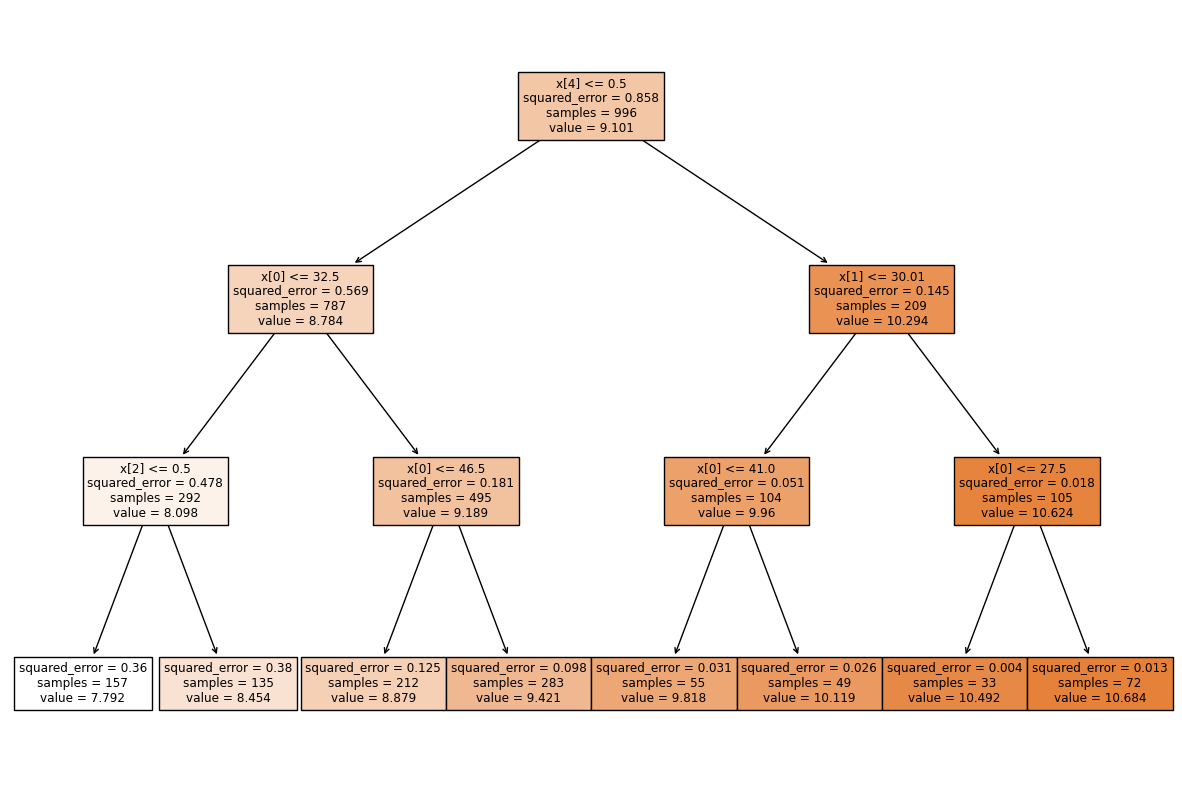

In [127]:
plt.figure(figsize = (15 , 10))
tree.plot_tree(reg , filled = True)

# **'Random Forest Regression'**

In [128]:
from sklearn.ensemble import RandomForestRegressor
reg_random = RandomForestRegressor(oob_score = True)
reg_random.fit(x_train , y_train)

RandomForestRegressor(oob_score=True)

In [140]:
# score of 'OUT OF BAG ERROR'
reg_random.oob_score_ * 100

79.36170444668417

In [144]:
# calculate the prediction of y_train and y_test
from sklearn.metrics import mean_absolute_error
y_pred_trainn = reg.predict(x_train)
y_pred_testt = reg.predict(x_test)

In [150]:
mean_absolute_error(y_train , y_pred_trainn)

0.25105324622116076

In [151]:
mean_absolute_error(y_test , y_pred_testt)

0.24868762093632243

In [153]:
reg_random.score(x_train , y_train)*100

97.07728277558618

In [154]:
reg_random.score(x_test , y_test)*100

76.17485311954324

**there is an overfit here : by using RANDOM FOREST REGRESSION , so it's not good for this DATA .**